# Gel equilibrium

For long polymers in solution, the free energy per unit volume reduces to
$$ f_\mathrm{sol}(\phi) = k_\mathrm{B} T \left[ (1-\phi) \log(1-\phi) + \chi \phi (1-\phi) \right], $$
where $\phi$ is the volume fraction of the polymers. For a gel in contact with this solution, the free energy density is
$$ f_\mathrm{gel}(\phi) = \frac23 G_0 \left[ \left(\frac{\phi_0}{\phi}\right)^{2/3} - 1 \right] + \frac{\phi_0}{\phi} f_\mathrm{sol}(\phi), $$
where $G_0$ is the gel's modulus, and $\phi_0$ the volume fraction of the reference state in which the gel is unswollen. Equilibrium implies that the derivative of $f_\mathrm{gel}(\phi)$ vanishes, which gives
$$ G_0 \left(\frac{\phi}{\phi_0}\right)^{1/3} = \phi f_\mathrm{sol}'(\phi) - f_\mathrm{sol}(\phi) = \Pi_\mathrm{sol}(\phi) = k_\mathrm{B} T \left[ -\log(1-\phi) - \phi - \chi \phi^2 \right]. $$
We need to solve this equation numerically.

In [37]:
# Python libraries
%reset -f
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=12)
#plt.rc('font', family='arial') # Not working?
plt.rc('axes', titlesize=16)
from scipy.optimize import fsolve   # Numerical solver, which takes an equation that should be zero and an initial guess. Cannot deal with ranges / singularities.
from scipy.optimize import brentq   # Numerical solver that finds the best root in a given range.

In [2]:
# The free energies
def fsol(x, chi): return (1-x) * np.log(1-x) + chi * x * (1-x)
def fgel(x, G, x0, chi): return 1.5*G*((x0/x)**(2/3) - 1) + (x0/x) * fsol(x, chi)

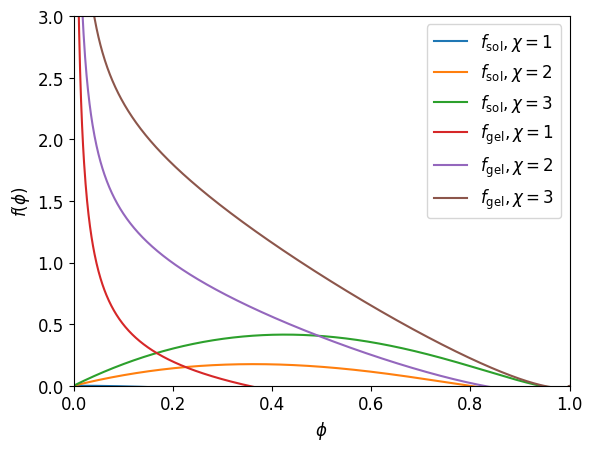

In [8]:
# Plot the free energies, for a range of values of chi.
x = np.linspace(0.001,0.999,998)
#plt.figure(figsize=(4,2))
#plt.figure(figsize=(18,6)) # NB: Size in inches.
#plt.subplot(1,3,1)
plt.plot(x, fsol(x, 1), x, fsol(x, 2), x, fsol(x, 3))
plt.plot(x, fgel(x, .1, 1, 1), x, fgel(x, .1, 1, 2), x, fgel(x, .1, 1, 3))
#plt.title('Hare / lynx population dynamics')
plt.xlim(0,1)
plt.ylim(0,3)
plt.xlabel('$\\phi$')
plt.ylabel('$f(\\phi)$')
plt.legend(['$f_\\mathrm{sol}, \\chi=1$', '$f_\\mathrm{sol}, \\chi=2$', '$f_\\mathrm{sol}, \\chi=3$', '$f_\\mathrm{gel}, \\chi=1$', '$f_\\mathrm{gel}, \\chi=2$', '$f_\\mathrm{gel}, \\chi=3$'])
#plt.axhline(y = 0, color = 'k', linestyle = ':')
#plt.axvline(x = 0, color = 'k', linestyle = ':')
#plt.legend(['$\chi_1 = \chi_2 = 2$', '$\chi_1 = 1, \chi_2 = 2$', '$\chi_1 = 2, \chi_2 = 1$'])
#plt.savefig("Landaufirstordertransitionsgraph.pdf", format="pdf", bbox_inches="tight")

In [40]:
# The osmotic pressure of the polymer in solution
def P(x, T, chi): return T * (-np.log(1-x) - x - chi * x * x)

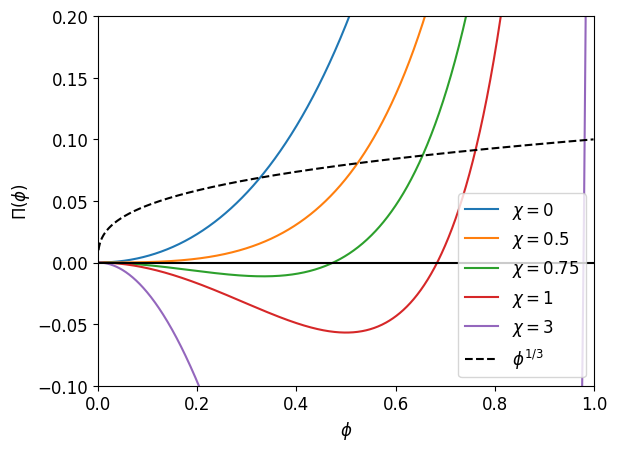

In [84]:
# Plot the osmotic pressure, for a range of values of chi.
x = np.linspace(0.001,0.999,998)
#plt.figure(figsize=(4,2))
#plt.figure(figsize=(18,6)) # NB: Size in inches.
#plt.subplot(1,3,1)
plt.plot(x, P(x, 1, 0), x, P(x, 1, 0.5), x, P(x, 1, 0.75), x, P(x, 1, 1), x, P(x, 1, 3))
plt.plot(x, x ** (1/3)/10, 'k--')
#plt.title('Hare / lynx population dynamics')
plt.xlim(0,1)
plt.ylim(-0.1,0.2)
#plt.ylim(-0.02,0.02)
plt.xlabel('$\\phi$')
plt.ylabel('$\\Pi(\\phi)$')
plt.legend(['$\\chi = 0$', '$\\chi = 0.5$', '$\\chi = 0.75$', '$\\chi = 1$', '$\\chi = 3$', '$\\phi^{1/3}$'])
plt.axhline(y = 0, color = 'k')
#plt.axvline(x = 0, color = 'k', linestyle = ':')
#plt.legend(['$\chi_1 = \chi_2 = 2$', '$\chi_1 = 1, \chi_2 = 2$', '$\chi_1 = 2, \chi_2 = 1$'])
#plt.savefig("Landaufirstordertransitionsgraph.pdf", format="pdf", bbox_inches="tight")

In [41]:
# Find solutions.
f = lambda x: x ** (1/3)/10 - P(x, 1, 0)
brentq(f, 0.2, 0.4)    # Find the root in between 0.2 and 0.4

0.3267212766987118

In [85]:
# Build an array of solutions.
gelroots = np.zeros((41,2))
i=0
for chi in np.linspace(0,1,21):
    f = lambda x: x ** (1/3)/10 - P(x, 1, chi)
    gelroots[i] = (chi, brentq(f, 0.2, 0.8))
    i+=1
i = 20
for chi in np.linspace(1,2,21):
    f = lambda x: x ** (1/3)/10 - P(x, 1, chi)
    gelroots[i] = (chi, brentq(f, 0.7, 0.95))
    i+=1


Text(0, 0.5, '$\\phi$')

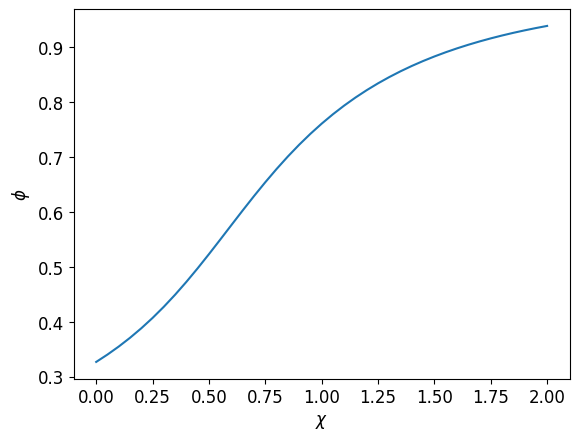

In [86]:
plt.plot(gelroots[:,0],gelroots[:,1])
plt.xlabel('$\\chi$')
plt.ylabel('$\\phi$')

In [10]:
# Plot of osmotic pressure for Flory-Huggins
def PFH(x, chi): return - np.log(1-x) - chi*x*x

(0.0, 1.0)

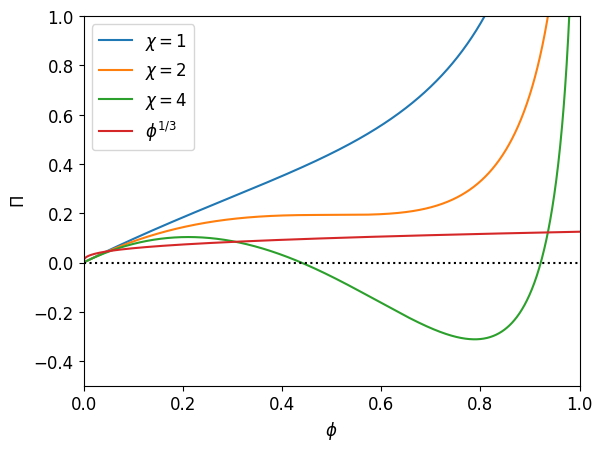

In [25]:
x = np.linspace(0.001,0.999,998)
plt.plot(x, PFH(x, 1), x, PFH(x, 2), x, PFH(x, 3), x, x ** (1/3)/8)
plt.xlabel('$\\phi$')
plt.ylabel('$\\Pi$')
plt.ylim(-0.5,1.0)
plt.legend(['$\\chi=1$', '$\\chi=2$', '$\\chi=3$', '$\\phi^{1/3}$'])
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.xlim(0,1)

# Ionic gels
If the gel consists of polyelectrolyte polymers which dissociate in water, there is a second term in the osmotic pressure, due to the presence of the free ions.
$$ \Pi_\mathrm{ion} = k_\mathrm{B} T \left[ \sqrt{n_\mathrm{b}^2 + 4 n_\mathrm{s}^2} - 2 n_\mathrm{s} \right], $$
where $n_\mathrm{b}$ is the number density of bound charges, and $n_\mathrm{s}$ the number density of (either positive or negative) ions in the solution outside the gel (assuming monovalence and activity $1$). If the solution contains no salt, $n_\mathrm{s} = 0$, and the additional swelling effect is largest. The number density $n_\mathrm{b}$ of the bound charges is proportional to the volume fraction of the polymers, through $n_\mathrm{b}/n_\mathrm{b}^0 = \phi / \phi_0$, so we can write down a combined osmotic pressure as a function of $\phi$ and $n_\mathrm{s}$.

In [63]:
# Osmotic pressure for charged polymers with ion density nb
def Pionic(x, nb, ns, chi): return -np.log(1-x) - x - chi*x*x + np.sqrt(4*ns*ns + nb*nb) - 2*ns

(-0.2, 1.0)

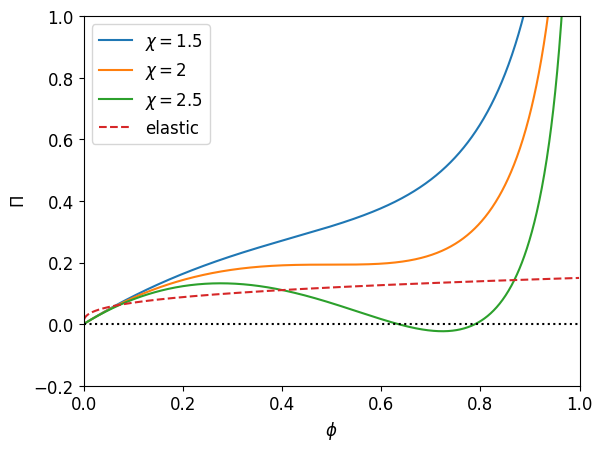

In [213]:
x = np.linspace(0.001,0.999,998)
plt.plot(x, Pionic(x, x, 0, 1.5), x, Pionic(x, x, 0, 2), x, Pionic(x, x, 0, 2.5))
plt.plot(x, 0.15 * x ** (1/3), '--')
plt.xlabel('$\\phi$')
plt.ylabel('$\\Pi$')
plt.legend(['$\\chi=1.5$', '$\\chi=2$', '$\\chi=2.5$', 'elastic'])
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.xlim(0, 1)
plt.ylim(-0.2,1.0)
#plt.ylim(-0.2,1)

In [177]:
f = lambda x: 0.15 * x ** (1/3) - Pionic(x, x, 0, 3.7)
(brentq(f, 0.1, 0.13), brentq(f, 0.13, 0.16), brentq(f, 0.9, 0.99))

(0.11120919577108661, 0.1456661885103062, 0.9742906252722688)

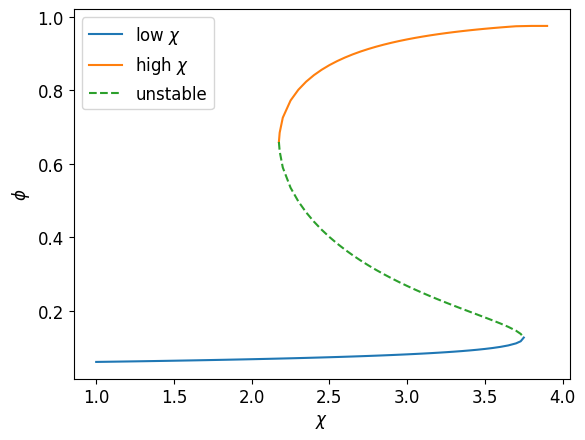

In [211]:
# Build an array of solutions.
ionroots1 = np.zeros((57,2))
ionroots2 = np.zeros((57,2))
ionroots3 = np.zeros((57,2))
i=0
a0 = 0.5
a1 = 0.65
b0 = 0.65
b1 = 0.8 
for chi in np.linspace(1,3.65,54):
    f = lambda x: 0.15 * x ** (1/3) - Pionic(x, x, 0, chi)
    ionroots1[i] = (chi, brentq(f, 0.01, 0.13))
    if ((chi > 2.175) and (chi<4.0)):
        ionroots2[i] = (chi, brentq(f, a0, a1))
        ionroots3[i] = (chi, brentq(f, b0, b1))
        #print((chi, ionroots1[i,1], ionroots2[i,1], ionroots3[i,1]))
        a0 = max(ionroots2[i,1]-0.1, 0.13)
        a1 = min((ionroots2[i,1], 0.65))
        b0 = max((ionroots3[i,1], 0.65))
        b1 = min((ionroots3[i,1]+0.1, 0.99))
        #print(a0, a1, b0, b1)
    i+=1

# High end of chi spectrum.
f = lambda x: 0.15 * x ** (1/3) - Pionic(x, x, 0, 3.7)
ionroots1[54] = (3.7, brentq(f, 0.1, 0.13))
ionroots2[54] = (3.7, brentq(f, 0.13, 0.16))
ionroots3[54] = (3.7, brentq(f, 0.95, 0.99))

f = lambda x: 0.15 * x ** (1/3) - Pionic(x, x, 0, 3.73)
ionroots1[55] = (3.73, brentq(f, 0.1, 0.13))
ionroots2[55] = (3.73, brentq(f, 0.13, 0.15))
ionroots3[55] = (3.8, brentq(f, 0.95, 0.99))

# At the very end, add the average point.
critpoint = 0.5 * (ionroots1[55,1] + ionroots2[55,1])
ionroots1[56] = (3.75, critpoint)
ionroots2[56] = (3.75, critpoint)
ionroots3[56] = (3.9, brentq(f, 0.95, 0.99))

# Low end of chi spectrum.
f = lambda x: 0.15 * x ** (1/3) - Pionic(x, x, 0, 2.18)
ionroots2[1] = (2.18, brentq(f, 0.48, 0.65))
ionroots3[1] = (2.18, brentq(f, 0.65, 0.82))

# Add the average point.
critpoint = 0.5 * (ionroots2[1,1] + ionroots3[1,1])
ionroots2[0] = (2.175, critpoint)
ionroots3[0] = (2.175, critpoint)


ionroots2=ionroots2[np.nonzero(ionroots2[:,0])]
ionroots3=ionroots3[np.nonzero(ionroots3[:,0])]
plt.plot(ionroots1[:,0], ionroots1[:,1], '-')
plt.plot(ionroots3[:,0], ionroots3[:,1], '-')
plt.plot(ionroots2[:,0], ionroots2[:,1], '--')
plt.xlabel('$\\chi$')
plt.ylabel('$\\phi$')
plt.legend(['low $\\chi$', 'high $\\chi$', 'unstable'])

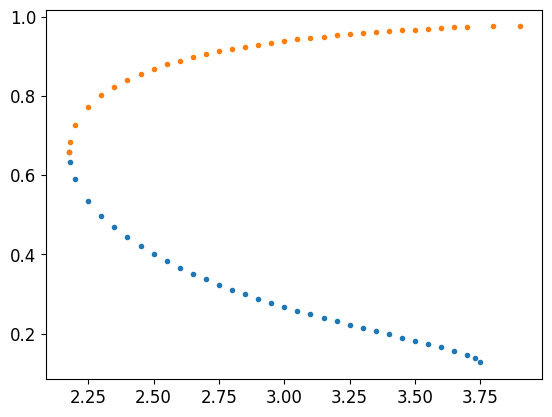

In [212]:
ionroots2=ionroots2[np.nonzero(ionroots2[:,0])]
ionroots3=ionroots3[np.nonzero(ionroots3[:,0])]
plt.plot(ionroots2[:,0], ionroots2[:,1], '.')
plt.plot(ionroots3[:,0], ionroots3[:,1], '.')

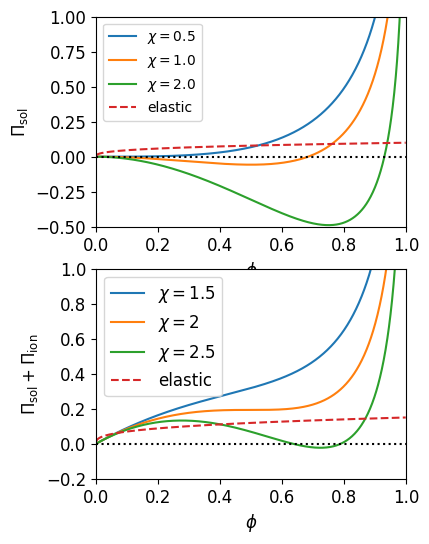

In [70]:
# Combined plots with phase diagrams.
plt.figure(figsize=(4,6)) # NB: Size in inches.

x = np.linspace(0.001,0.999,998)
plt.subplot(2,1,1)
plt.plot(x, P(x, 1, 0.5), x, P(x, 1, 1.0), x, P(x, 1, 2))
plt.plot(x, 0.1 * x ** (1/3), '--')
plt.xlabel('$\\phi$')
plt.ylabel('$\\Pi_\\mathrm{sol}$')
plt.legend(['$\\chi=0.5$', '$\\chi=1.0$', '$\\chi=2.0$', 'elastic'], prop={'size': 10})
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.xlim(0,1)
plt.ylim(-0.5,1.0)

plt.subplot(2,1,2)
plt.plot(x, Pionic(x, x, 0, 1.5), x, Pionic(x, x, 0, 2), x, Pionic(x, x, 0, 2.5))
plt.plot(x, 0.15 * x ** (1/3), '--')
plt.xlabel('$\\phi$')
plt.ylabel('$\\Pi_\\mathrm{sol} + \\Pi_\\mathrm{ion}$')
plt.legend(['$\\chi=1.5$', '$\\chi=2$', '$\\chi=2.5$', 'elastic'])
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.xlim(0,1)
plt.ylim(-0.2,1)

plt.savefig("Gelosmoticpressureplots.pdf", format="pdf", bbox_inches="tight")

<Figure size 600x400 with 0 Axes>

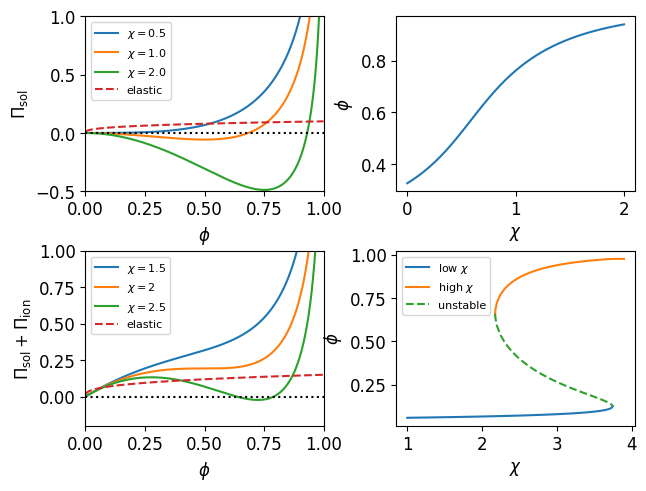

In [230]:
# Combined plots with phase diagrams.
#plt.figure(figsize=(8,6)) # NB: Size in inches.
plt.figure(figsize=(6,4)) # NB: Size in inches.

x = np.linspace(0.001,0.999,998)

# Without this, axes overlap labels of other subplots.
fig, ax = plt.subplots(2,2)
fig.tight_layout(h_pad=1.5)

plt.subplot(2,2,1)  # nrows, ncolumns, position
plt.plot(x, P(x, 1, 0.5), x, P(x, 1, 1.0), x, P(x, 1, 2))
plt.plot(x, 0.1 * x ** (1/3), '--')
plt.xlabel('$\\phi$')
plt.ylabel('$\\Pi_\\mathrm{sol}$')
plt.legend(['$\\chi=0.5$', '$\\chi=1.0$', '$\\chi=2.0$', 'elastic'], prop={'size': 8})
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.xlim(0,1)
plt.ylim(-0.5,1.0)

plt.subplot(2,2,3)
plt.plot(x, Pionic(x, x, 0, 1.5), x, Pionic(x, x, 0, 2), x, Pionic(x, x, 0, 2.5))
plt.plot(x, 0.15 * x ** (1/3), '--')
plt.xlabel('$\\phi$')
plt.ylabel('$\\Pi_\\mathrm{sol} + \\Pi_\\mathrm{ion}$')
plt.legend(['$\\chi=1.5$', '$\\chi=2$', '$\\chi=2.5$', 'elastic'], prop={'size': 8})
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.xlim(0,1)
plt.ylim(-0.2,1)

plt.subplot(2,2,2)
plt.plot(gelroots[:,0],gelroots[:,1])
plt.xlabel('$\\chi$')
plt.ylabel('$\\phi$')

plt.subplot(2,2,4)
plt.plot(ionroots1[:,0], ionroots1[:,1], '-')
plt.plot(ionroots3[:,0], ionroots3[:,1], '-')
plt.plot(ionroots2[:,0], ionroots2[:,1], '--')
plt.xlabel('$\\chi$')
plt.ylabel('$\\phi$')
plt.legend(['low $\\chi$', 'high $\\chi$', 'unstable'], prop={'size': 8}, loc='upper left')

plt.savefig("Gelosmoticpressureplots.pdf", format="pdf", bbox_inches="tight")

\begin{align*}
\vec{\sigma} + \tau_\mathrm{p} \frac{\nabla \vec{\sigma}}{\nabla t} &= \vec{\sigma_\mathrm{p}} + \vec{\sigma_\mathrm{s}} + \tau_\mathrm{p} \frac{\nabla \vec{\sigma_\mathrm{p}}}{\nabla t} + \tau_\mathrm{p} \frac{\nabla \vec{\sigma_\mathrm{s}}}{\nabla t} \\
&= \eta_\mathrm{p} \dot{\vec{\gamma}} + \eta_\mathrm{s} \dot{\vec{\gamma}} + \tau_\mathrm{p} \eta_\mathrm{s} \frac{\nabla \vec{\gamma_\mathrm{s}}}{\nabla t} \\
&= \eta \left[\dot{\vec{\gamma}} + \tau_\mathrm{r} \frac{\nabla \vec{\gamma_\mathrm{s}}}{\nabla t} \right],
\end{align*}